# Basic Plotly Charts

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Scatter Plot](##1) <br>
2.  [Line Plot](##2) <br>
3.  [Bar Chart](##3)<br>
4.  [Histogram](##4) <br>
5.  [Bubble Chart](##5) <br>
6.  [Pie Chart](##6) <br>
7.  [SunBurst Charts]()<br>

</div>


# Plotly graph objects and Plotly express libraries to plot different types of charts 

## Plotly Libraries

**plotly.graph_objects:** 
This is a low level interface to figures, traces and layout. The Plotly graph objects module provides an automatically generated hierarchy of classes ( figures, traces, and layout) called graph objects. These graph objects represent figures with a top-level class plotly.graph_objects.Figure.

**plotly.express:** 
Plotly express is a high-level wrapper for Plotly. It is a recommended starting point for creating the most common figures provided by Plotly using a simpler syntax. It uses graph objects internally.
Now let us use these libraries to plot some charts
We will start with plotly_graph_objects to plot line and scatter plots
> Note: You can hover the mouse over the charts whenever you want to view any statistics in the visualization charts 

In [72]:
#Importing Packages
import piplite
await piplite.install(['nbformat', 'plotly'])

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## Let's Apply Plotly Skills to The Airline Dataset:

The Reporting Carrier On-Time Performance Dataset contains information on approximately 200 million domestic US flights reported to the United States Bureau of Transportation Statistics. The dataset contains basic information about each flight (such as date, time, departure airport, arrival airport) and, if applicable, the amount of time the flight was delayed and information about the reason for the delay. This dataset can be used to predict the likelihood of a flight arriving on time.

Preview data, dataset metadata, and data glossary [here.](https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/data-preview/index.html)

In this Exercice, we will try to visually capture details such as

* Departure time changes with respect to airport distance.

* Average Flight Delay time over the months

* Comparing number of flights in each destination state

* Number of  flights per reporting airline

* Distrubution of arrival delay

* Proportion of distance group by month (month indicated by numbers)

* Hierarchical view in othe order of month and destination state holding value of number of flights

**Before starting our Viz Journey, Let's read the data first into Pandas dataframe:**.

# Read Data

In [35]:
# Read the airline data into pandas dataframe
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv'
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

airline_data =  pd.read_csv(text,
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [60]:
# Shape of the data
airline_data.shape

(27000, 110)

In [61]:
# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)
# Get the shape of the trimmed data
data.shape

# plotly.graph_objects

## 1. Scatter Plot<a id="1"></a>


Let us use a scatter plot to represent departure time changes with respect to airport distance

This plot should contain the following

* Title as **Distance vs Departure Time**.
* x-axis label should be **Distance**
* y-axis label should be **DeptTime**
* **Distance** column data from the flight delay dataset should be considered in x-axis
* **DepTime** column data from the flight delay dataset should be considered in y-axis
* Scatter plot markers should be of red color


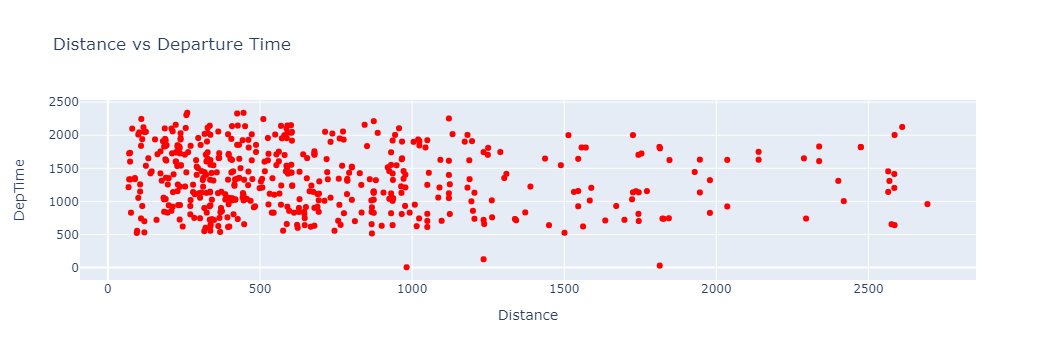

In [46]:
##First we will create an empty figure ising go.Figure()
fig=go.Figure()
#Next we will create a scatter plot by using the add_trace function and use the go.scatter() function within it
# In go.Scatter we define the x-axis data,y-axis data and define the mode as markers with color of the marker as red
fig.add_trace(go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')

#### Inferences
We can notice more flights round the clock for shorter distances. However, for longer distance there are limited flights through the day.

## 2. Line Plot <a id="2"></a>


Let us now use a line plot to extract average monthly arrival delay time and see how it changes over the year.

  This plot should contain the following

* Title: **Month vs Average Flight Delay Time**.
* x-axis: **Month** and y-axis: **ArrDelay**
* A new dataframe **line_data** should be created which consists of 2 columns average **arrival delay time per month** and **month** from the dataset
* **Month** column data from the line_data dataframe should be considered in x-axis
* **ArrDelay** column data from the ine_data dataframeshould be considered in y-axis
* Plotted line in the line plot should be of green color

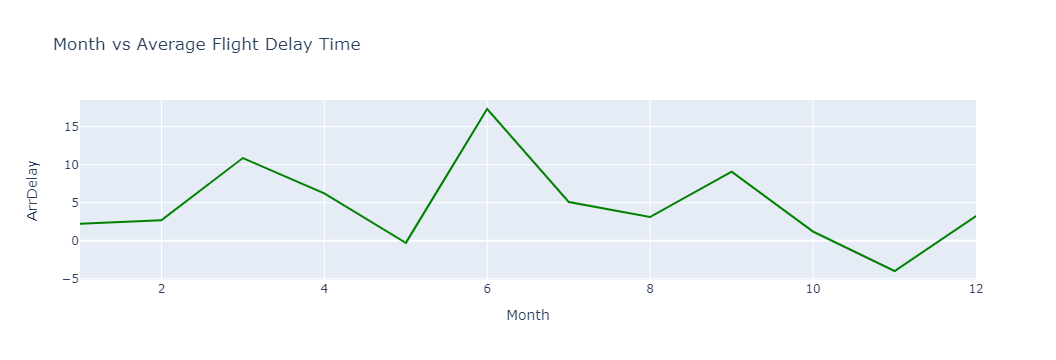

In [73]:
# Group the data by Month and compute average over arrival delay time.
line_data = data.groupby('Month')['ArrDelay'].mean().reset_index()
## Write your code here
##First we will create an empty figure ising go.Figure()
fig=go.Figure()
##Next we will create a line plot by using the add_trace function and use the go.scatter() function within it
# In go.Scatter we define the x-axis data,y-axis data and define the mode as lines with color of the marker as green
fig.add_trace(go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
# Create line plot here
## Here we update these values under function attributes such as title,xaxis_title and yaxis_title
fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
fig.show()

#### Inferences

It is found that in the month of June the average monthly delay time is the maximum


# plotly.express


## 3. Bar Chart <a id="3"></a>



Let us use a bar chart to extract number of flights from a specific airline that goes to a destination

In this plot we will contain the following

* Title: **Total number of flights to the destination state split by reporting air**.
* x-axis: **DestState** and y-axis: **Flights**
* Create a new dataframe called **bar_data**  which contains 2 columns **DestState** and **Flights**.Here **flights** indicate total number of flights in each combination.


In [50]:
# Group the data by destination state and reporting airline. Compute total number of flights in each combination
bar_data = data.groupby('DestState')['Flights'].sum().reset_index()
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

#### Note :
It is found that maximum flights are to destination state **CA** which is around 68 and there is only 1 flight to destination state **VT**


## 4. Histogram <a id="4"></a>


Let us represent the distribution of arrival delay using a histogram

This plot will have the following

* Title as **Total number of flights to the destination state split by reporting air**.
* x-axis label should be **ArrayDelay**
* y-axis will show the count of arrival delay


In [54]:
# Set missing values to 0
data['ArrDelay'] = data['ArrDelay'].fillna(0)
fig = px.histogram(data, x="ArrDelay",title="Total number of flights to the destination state split by reporting air.")
fig.show()

## 5. Bubble Chart <a id="5"></a>


Let  use a bubble plot to represent number of flights as per reporting airline with respect to the following:

* Title as **Reporting Airline vs Number of Flights**.
* x-axis label should be **Reporting_Airline**
* y-axis label should be **Flights**
* size of the bubble should be **Flights** indicating number of flights
* Name of the hover tooltip to `reporting_airline` using `hover_name` parameter.


In [56]:
# Group the data by reporting airline and get number of flights
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()
## Bubble chart using px.scatter function with x ,y and size variables defined.Title defined as Reporting Airline vs Number of Flights
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()

## 6. Pie Chart <a id="6"></a>


Let us represent the proportion of Flights by Distance Group (Flights indicated by numbers)

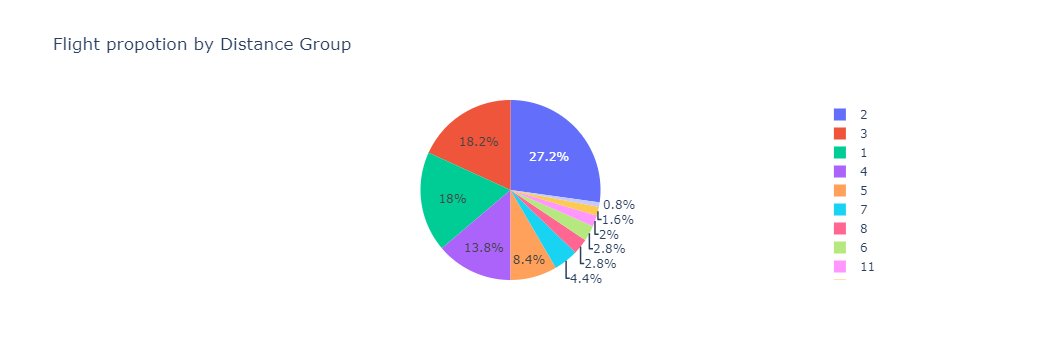

In [74]:
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Flight propotion by Distance Group')
fig.show()

## 7. SunBurst Charts <a id="7"></a>


Let us represent the hierarchical view in othe order of month and destination state holding value of number of flights, With respect to the following: 
*  Define hierarchy of sectors from root to leaves in `path` parameter. Here, we go from `Month` to `DestStateName` feature.
*   Set sector values in `values` parameter. Here, we can pass in `Flights` feature.
*   Show the figure.
*   Title as **Flight Distribution Hierarchy**


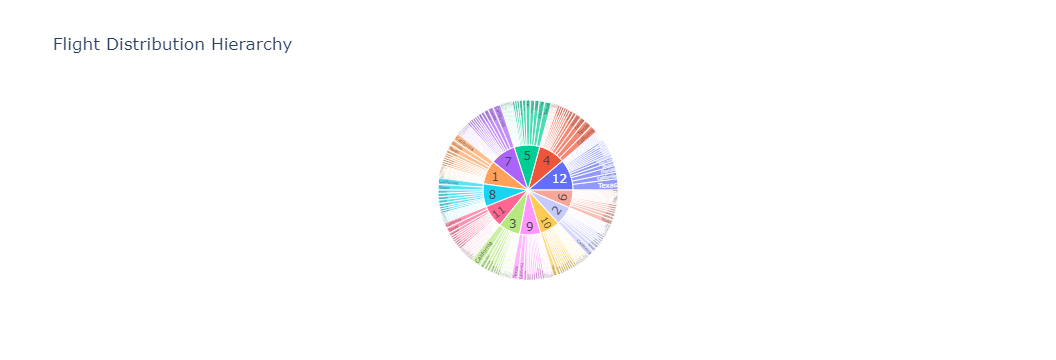

In [59]:
## Write your code here
fig = px.sunburst(data, path=['Month', 'DestStateName'], values='Flights',title='Flight Distribution Hierarchy')
fig.show()

## Author

<a href="https://www.linkedin.com/in/youness-el-amine-ba21a9197/" target="_blank">EL AMINE Youness</a>